# Exploratory Data Analysis (EDA)

## Imports

In [7]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact
import ipywidgets as widgets

## Data

In [3]:
raw_data = np.load('../dataset/Task02_Heart/raw/imagesTr/image_003.npy')
crop_data = np.load('../dataset/Task02_Heart/cropped/imagesTr/image_003.npy')
preprocessed_data = np.load('../dataset/Task02_Heart/preprocessed/imagesTr/image_003.npy')
preprocessed_pad_data = np.load('../dataset/Task02_Heart/preprocessed_pad/imagesTr/image_003.npy')

In [4]:
print('raw_data shape: ', raw_data.shape)
print('crop_data shape: ', crop_data.shape)
print('preprocessed_data shape: ', preprocessed_data.shape)
print('preprocessed_pad_data shape: ', preprocessed_pad_data.shape)

raw_data shape:  (130, 320, 320)
crop_data shape:  (130, 320, 232)
preprocessed_data shape:  (130, 320, 232)
preprocessed_pad_data shape:  (130, 320, 256)


## Visualisation

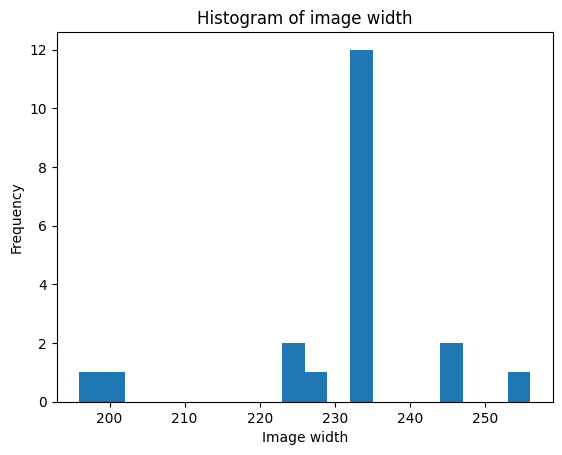

In [5]:
shapes = []
dir = '../dataset/Task02_Heart/preprocessed/imagesTr'
for file in os.listdir(dir):
    if file.endswith('.npy'):
        data = np.load(os.path.join(dir, file))
        shapes.append(data.shape[-1])

plt.hist(shapes, bins=20)
plt.title('Histogram of image width')
plt.xlabel('Image width')
plt.ylabel('Frequency')
plt.show()

In [6]:
def plot_slice(dataset, type, image, slice):
    image_number = str(image).zfill(3)
    path = f'../dataset/Task02_Heart/{dataset}/{type}sTr/{type}_{image_number}.npy'
    if os.path.exists(path):
        im = np.load(path)
    else:
        im = np.zeros((130, 320, 320))
    if slice > im.shape[0]:
        slice = im.shape[0] - 1
    plt.imshow(im[slice], cmap='gray')
    plt.show()

interact(plot_slice, 
         dataset=widgets.Dropdown(options=['raw', 'cropped', 'preprocessed', 'preprocessed_pad'], value='raw'),
         type=widgets.Dropdown(options=['image', 'label'], value='image'),
         image=widgets.IntSlider(min=3, max=30, step=1, value=0), 
         slice=widgets.IntSlider(min=0, max=129, step=1, value=0))

interactive(children=(Dropdown(description='dataset', options=('raw', 'cropped', 'preprocessed', 'preprocessed…

<function __main__.plot_slice(dataset, type, image, slice)>

## DataLoader Test

In [12]:

from data_loader import load_data

sys.path.append('nnUNet')

task_folder_path = '../dataset/Task02_Heart'
train_dataloader, val_dataloader = load_data(task_folder_path, dataset_type="raw", val_size=0.2, batch_size=1, shuffle=True)

for i, (images, labels) in enumerate(train_dataloader):
    print(images.shape)
    print(labels.shape)
    break

100%|██████████| 20/20 [00:01<00:00, 10.37it/s]


torch.Size([1, 110, 320, 320])
torch.Size([1, 110, 320, 320])
